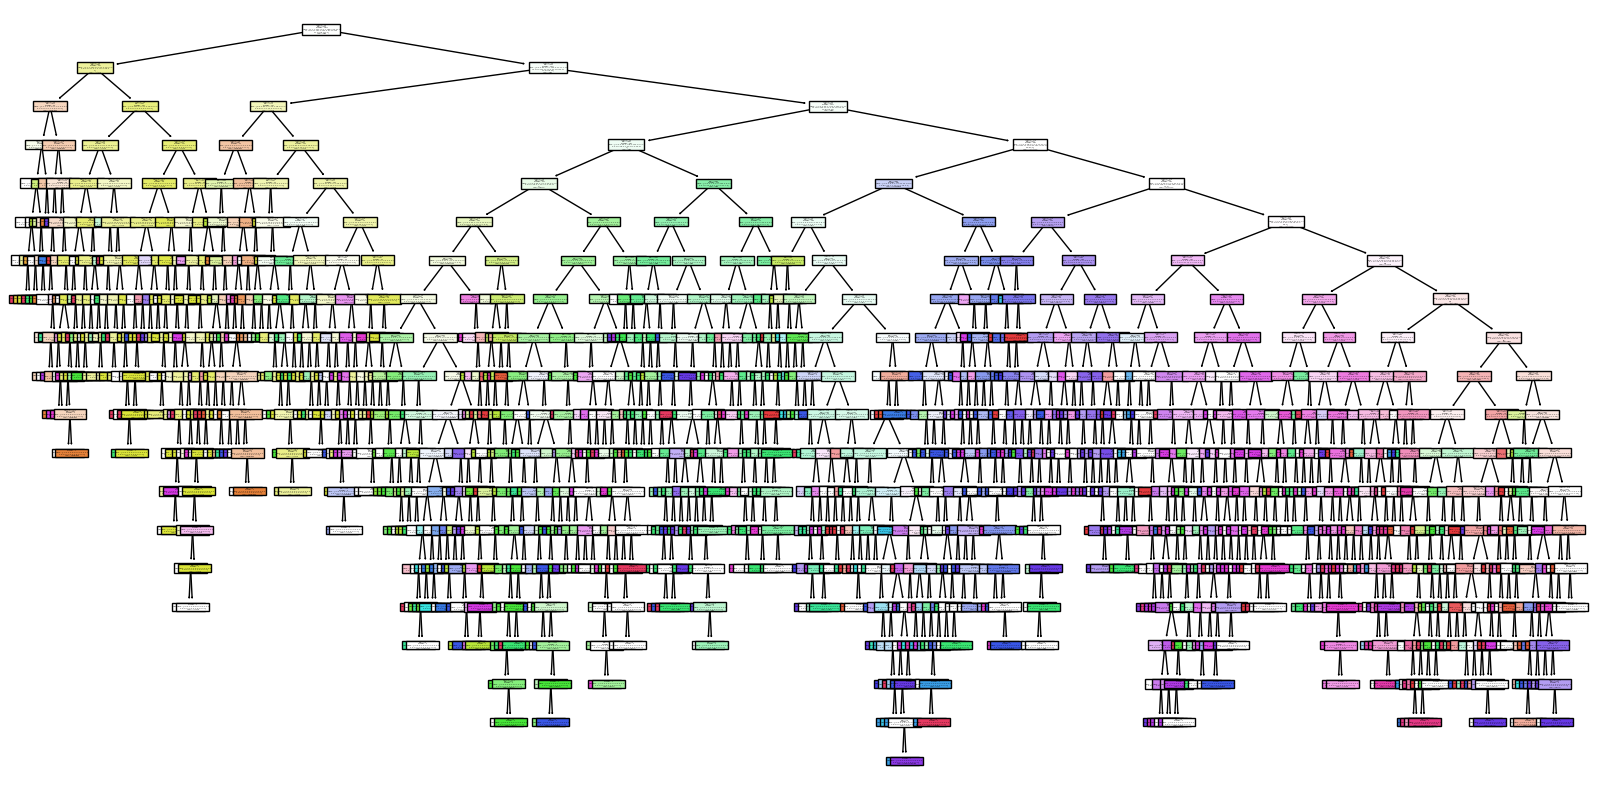

In [ ]:
#Implement a decision tree model to predict the winner of a match between two teams (Team1 and Team2)
#- Use the provided datasets (ODI and T20) to train and test the model
# 1. Read and explore the provided datasets (ODI and T20)

# 2. Split the data into training and testing sets (80% for training and 20% for testing)

#3. Implement a decision tree classifier (use encoding decoding)

#4. Train the model using the training data

# 5. Evaluate the model's performance using the testing data

# 6. Use the trained model to predict the winner for a given input (Team1, Team2, Venue) //random for testing
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder

df = pd.read_csv('odi.csv')

# Check for NaN values and handle them
df = df.dropna()

# Encode categorical variables
label_encoder_team = LabelEncoder()
df['team1_encoded'] = label_encoder_team.fit_transform(df['team1'])
df['team2_encoded'] = label_encoder_team.fit_transform(df['team2'])
label_encoder_venue = LabelEncoder()
df['venue_encoded'] = label_encoder_venue.fit_transform(df['venue'])
label_encoder_winner = LabelEncoder()
df['winner_encoded'] = label_encoder_winner.fit_transform(df['winner'])

# Features and target
X = df[['team1_encoded', 'team2_encoded', 'venue_encoded']]
y = df['winner_encoded']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a decision tree classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Plot the decision tree
plt.figure(figsize=(20,10))
plot_tree(clf, feature_names=['team1', 'team2', 'venue'], class_names=label_encoder_winner.classes_, filled=True)
plt.show()


In [ ]:


# Calculate the training and testing accuracy
train_accuracy = clf.score(X_train, y_train)
test_accuracy =clf.score(X_test, y_test)

print("Training Accuracy: ", train_accuracy)
print("Testing Accuracy: ", test_accuracy)


Training Accuracy:  0.8644245927482922
Testing Accuracy:  0.5882352941176471


In [17]:

from sklearn.metrics import accuracy_score
# Make predictions on training and test sets
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)

# Calculate accuracy scores
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Train Accuracy: {train_accuracy:.2f}")
print(f"Test Accuracy: {test_accuracy:.2f}")

Train Accuracy: 0.86
Test Accuracy: 0.59


# Train Accuracy is .86  and Test Accuracy .59
As we know decision tree underfit model . so we apply  Randam forest  with best parameter Grid

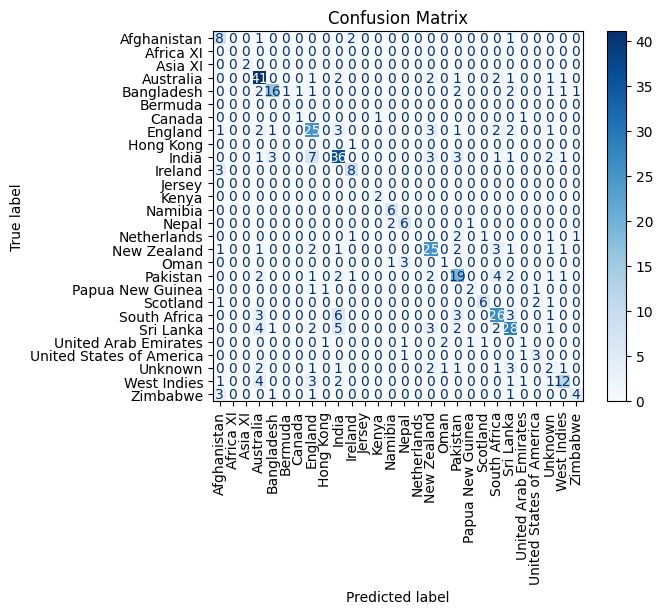

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Make predictions on the test set
y_pred = clf.predict(X_test)
# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder_winner.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.xticks(rotation=90)  # Rotate x-axis labels if they overlap
plt.title("Confusion Matrix")
plt.show()

In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import  GridSearchCV

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Best parameters found: {'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 200}


Text(0.5, 1.0, 'Confusion Matrix for Tuned Random Forest Classifier')

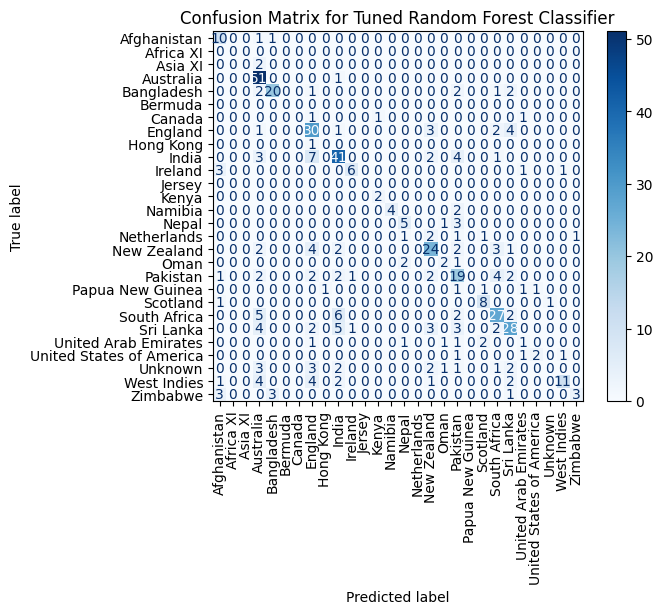

In [10]:
# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Perform grid search with cross-validation
rf_clf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=rf_clf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Best parameters from the grid search
best_params = grid_search.best_params_
print(f"Best parameters found: {best_params}")

# Train the Random Forest classifier with the best parameters
best_rf_clf = grid_search.best_estimator_

# Make predictions on the test set
y_pred = best_rf_clf.predict(X_test)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=best_rf_clf.classes_)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder_winner.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.xticks(rotation=90)  # Rotate x-axis labels if they overlap
plt.title("Confusion Matrix for Tuned Random Forest Classifier")

In [16]:

from sklearn.metrics import accuracy_score
# Make predictions on training and test sets
y_train_pred = best_rf_clf.predict(X_train)
y_test_pred = best_rf_clf.predict(X_test)

# Calculate accuracy scores
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Train Accuracy: {train_accuracy:.2f}")
print(f"Test Accuracy: {test_accuracy:.2f}")

Train Accuracy: 0.75
Test Accuracy: 0.62


 our Accuray is improved  by applying the Random forest  
 Train Accuracy: 0.75
Test Accuracy: 0.62

## Saving model and corresponsing Label encoders 

In [ ]:
import joblib

# Save the model and label encoders
joblib.dump(model, 'rf_model.pkl')
joblib.dump(label_encoders, 'label_encoders.pkl')